In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [6]:
pic_num = 0

image = mpimg.imread(f'tsp-cv/{pic_num}.jpg')

with open('tsp-cv/train.csv') as f:
    for i, line in enumerate(f):
        if i == pic_num+1:
            print(line)
            true_lenght = int(line.split(',')[2])
            break

print(true_lenght)
plt.imshow(image)

0,0.jpg,83110

83110


In [7]:
import circle_detection_functions
import line_detection_functions

from functools import partial

In [8]:
circle_detecter_function = partial(circle_detection_functions.get_yellow_circles_cv2)
line_detecter_function = partial(line_detection_functions.get_next_pos)

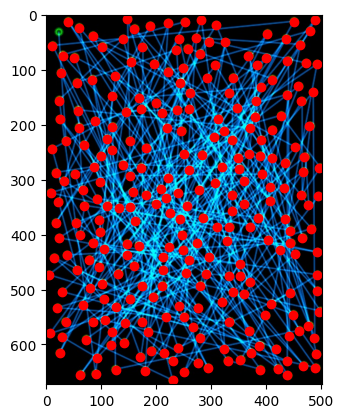

In [9]:
#detect the circles
detected_positions = list(circle_detecter_function(image))

plt.imshow(image)
for p in detected_positions:
    plt.plot(p[0], p[1], 'ro')

In [10]:
#detect the green circle
image_cp = image.copy()
image_cp = image_cp.astype('int32')
green_matrix = image_cp[:,:,1] - image_cp[:,:,0] - image_cp[:,:,2] - 100
green_matrix = green_matrix.clip(min=0)

all_green_positions = np.nonzero(green_matrix)

average_green_position = np.mean(all_green_positions, axis=1)

start_pos = (int(average_green_position[1]), int(average_green_position[0]))

plt.imshow(green_matrix, cmap='gray')
plt.plot(start_pos[0],start_pos[1], 'ro')


In [11]:
#detect the lines
remaining_positions = list(detected_positions.copy())

current_pos = start_pos

sorted_positions = [current_pos]
while len(remaining_positions) > 0:
    next_pos = line_detecter_function(image, current_pos, remaining_positions)
    print("detected next_pos: ",remaining_positions[next_pos])
    current_pos = remaining_positions.pop(next_pos)
    sorted_positions.append(current_pos)

detected next_pos:  [ 35 229]
detected next_pos:  [159 457]
detected next_pos:  [244 123]
detected next_pos:  [219 206]
detected next_pos:  [153 350]
detected next_pos:  [212 465]
detected next_pos:  [152 518]
detected next_pos:  [251 550]
detected next_pos:  [284 255]
detected next_pos:  [421 644]
detected next_pos:  [ 54 378]
detected next_pos:  [369 254]
detected next_pos:  [181 328]
detected next_pos:  [132 351]
detected next_pos:  [211 493]
detected next_pos:  [255 470]
detected next_pos:  [217 550]
detected next_pos:  [370 206]
detected next_pos:  [349 260]
detected next_pos:  [407 339]
detected next_pos:  [443 393]
detected next_pos:  [435 371]
detected next_pos:  [444 416]
detected next_pos:  [407 314]
detected next_pos:  [390 228]
detected next_pos:  [381 157]
detected next_pos:  [285 370]
detected next_pos:  [249 428]
detected next_pos:  [ 67 529]
detected next_pos:  [274 416]
detected next_pos:  [260 446]
detected next_pos:  [213 441]
detected next_pos:  [174 494]
detected n

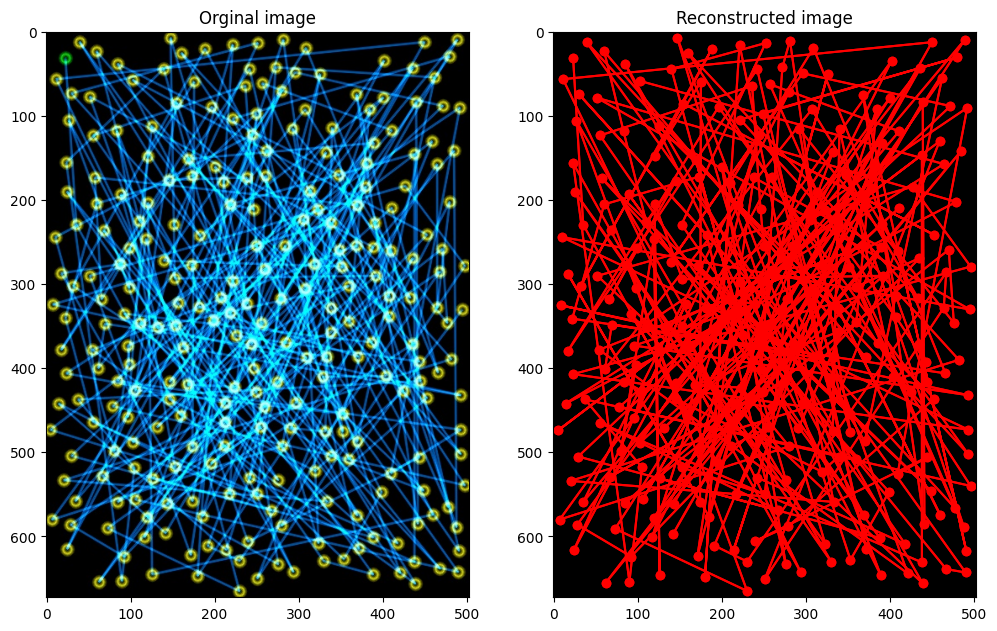

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].imshow(image)
axs[0].set_title("Orginal image")

aprox_image = np.zeros(image.shape)
axs[1].imshow(aprox_image)
axs[1].set_title("Reconstructed image")
axs[1].plot([x[0] for x in sorted_positions], [x[1] for x in sorted_positions], 'ro-')
axs[1].plot([x[0] for x in sorted_positions], [x[1] for x in sorted_positions], 'ro-')

In [13]:
print("orginal path lenght: ", true_lenght)

lenght = 0
for i in range(1, len(sorted_positions)):
    lenght += np.linalg.norm(np.array(sorted_positions[i]) - np.array(sorted_positions[i-1]))

print("Lenght of the path: ", lenght)

orginal path lenght:  83110
Lenght of the path:  81947.41543991528


# Pathfinding solutions

In [14]:
all_positions = detected_positions.copy()
all_positions.insert(0, start_pos)

In [15]:
#get the connection matrix the smaller the value the better the connection

matr = line_detection_functions.get_connection_matrix(image,all_positions)

print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in matr]))

inf	0.4157181571815718	0.33798326026305303	0.37934724451578383	0.4887459807073955	0.41531581889323643	0.49587231700605394	0.3711681855840928	0.45182362547632005	0.32569558101472995	0.4208860759493671	0.33813364055299544	0.39533949377259947	0.3158813263525305	0.4327002477291495	0.3687985654512851	0.36896551724137927	0.3305033353547605	0.5382452193475815	0.47274954072259645	0.41683694319574993	0.4374633000587199	0.7448863636363636	0.381492797904845	0.4035294117647059	0.3060437205315045	0.36979490366687384	0.31283905967450276	0.32834507042253525	0.44594594594594594	0.39619274241522906	0.47641791044776116	0.3996569468267581	0.33375634517766495	0.7017964071856287	0.4238178633975481	0.8698547215496368	0.4742647058823529	0.3973717146433041	0.3219241443108233	0.39692307692307693	0.34360655737704915	0.3928571428571429	0.37777777777777777	0.5204531151667715	0.3415578132559265	0.39366515837104077	0.6259445843828715	0.4767367750159337	0.3419267299864315	0.34558823529411764	0.36777251184834125	0.34

In [16]:
#should be same as solving with get_next_pos
simple_path_order, score = line_detection_functions.get_simple_best_path(matr)
print(score,simple_path_order)

11.330267830541919 [0, 183, 85, 221, 192, 128, 82, 62, 49, 175, 9, 117, 174, 142, 127, 72, 80, 50, 191, 170, 136, 112, 121, 103, 150, 184, 210, 124, 96, 58, 101, 87, 91, 70, 138, 119, 134, 29, 255, 36, 71, 99, 100, 126, 116, 76, 225, 106, 97, 188, 185, 147, 131, 122, 109, 253, 266, 165, 161, 48, 198, 187, 199, 88, 64, 66, 60, 92, 152, 166, 172, 146, 202, 186, 223, 258, 115, 212, 125, 251, 262, 182, 25, 57, 21, 230, 133, 123, 226, 94, 33, 27, 65, 59, 232, 132, 143, 95, 120, 144, 149, 86, 105, 176, 189, 242, 220, 39, 155, 90, 218, 24, 16, 160, 140, 5, 219, 78, 214, 14, 83, 41, 56, 247, 74, 114, 129, 110, 231, 169, 20, 239, 35, 236, 30, 151, 141, 40, 205, 22, 145, 84, 98, 104, 111, 69, 177, 8, 193, 156, 157, 44, 171, 130, 224, 75, 217, 180, 235, 181, 154, 259, 213, 244, 46, 159, 38, 248, 19, 203, 173, 79, 196, 28, 67, 234, 249, 167, 241, 47, 222, 243, 32, 207, 148, 257, 53, 93, 61, 4, 211, 11, 246, 263, 43, 252, 102, 265, 37, 216, 3, 162, 81, 190, 73, 215, 63, 137, 54, 206, 194, 135, 108,

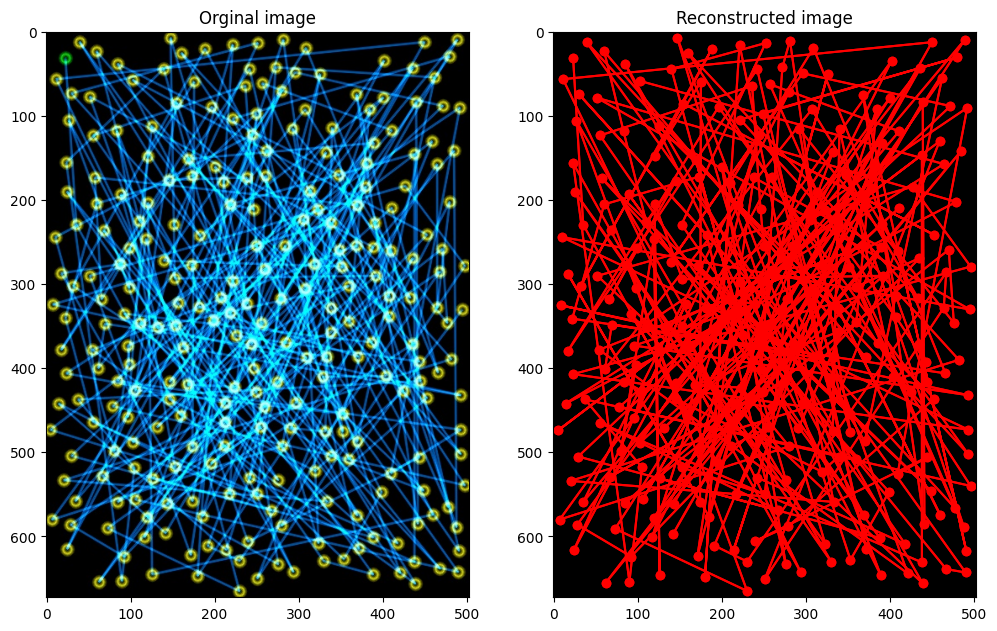

In [17]:
simple_path = [all_positions[i] for i in simple_path_order]

fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].imshow(image)
axs[0].set_title("Orginal image")

aprox_image = np.zeros(image.shape)
axs[1].imshow(aprox_image)
axs[1].set_title("Reconstructed image")
axs[1].plot([x[0] for x in simple_path], [x[1] for x in simple_path], 'ro-')
axs[1].plot([x[0] for x in simple_path], [x[1] for x in simple_path], 'ro-')

In [18]:
print("orginal path lenght: ", true_lenght)

lenght = 0
for i in range(1, len(simple_path)):
    lenght += np.linalg.norm(np.array(simple_path[i]) - np.array(simple_path[i-1]))

print("Lenght of the path: ", lenght)

orginal path lenght:  83110
Lenght of the path:  81947.41543991528


## edeting the connection matrix

In [19]:
#try different functions for the connection matrix
#matr = line_detection_functions.get_connection_matrix(image,all_positions,lambda x: 1-x)

#(x/(x-1.01))**2
#also try tan()
#aslo scale the columns separately

In [20]:
backup = matr.copy()

In [21]:
matr = backup.copy()

In [22]:
matr = backup.copy()
for row in range(matr.shape[0]):
    part = matr[row]
    idx = np.argpartition(part, 4)
    #print( part[idx[0]], part[idx[1]], part[idx[2]], part[idx[3]])
    #part = part - min(part[idx[0:3]])
    
    mean = np.mean(part[idx[0:3]])
    part = part / (mean+0.0001)
    matr[row] = part


In [23]:
print('\n'.join(['\t'.join([f"{cell: 0.2f}" for cell in row]) for row in matr]))

 inf	 4.50	 3.66	 4.10	 5.29	 4.49	 5.37	 4.02	 4.89	 3.52	 4.55	 3.66	 4.28	 3.42	 4.68	 3.99	 3.99	 3.58	 5.82	 5.12	 4.51	 4.73	 8.06	 4.13	 4.37	 3.31	 4.00	 3.38	 3.55	 4.83	 4.29	 5.15	 4.32	 3.61	 7.59	 4.59	 9.41	 5.13	 4.30	 3.48	 4.29	 3.72	 4.25	 4.09	 5.63	 3.70	 4.26	 6.77	 5.16	 3.70	 3.74	 3.98	 3.73	 4.22	 3.71	 8.51	 4.49	 3.69	 4.91	 3.70	 3.93	 5.11	 5.06	 3.89	 4.38	 4.07	 3.23	 7.10	 3.61	 5.99	 4.97	 3.38	 3.33	 4.95	 4.05	 4.04	 4.32	 3.34	 9.38	 3.72	 3.78	 5.05	 3.88	 4.11	 4.95	 5.10	 4.10	 2.27	 6.43	 9.15	 3.80	 3.66	 4.84	 5.85	 2.85	 3.83	 2.24	 3.67	 5.07	 3.97	 4.27	 3.45	 5.41	 2.83	 5.55	 4.40	 4.15	 7.68	 3.55	 4.29	 6.30	 5.54	 3.20	 3.12	 4.58	 4.01	 3.90	 5.64	 8.56	 4.30	 5.66	 3.05	 4.03	 3.00	 4.79	 4.86	 3.99	 4.83	 4.55	 6.03	 3.51	 4.66	 5.31	 3.21	 2.96	 7.73	 3.35	 5.43	 4.82	 3.97	 3.38	 3.49	 4.57	 9.21	 4.88	 5.21	 6.18	 4.77	 3.30	 4.85	 3.49	 4.17	 6.08	 3.60	 5.88	 5.37	 5.16	 3.57	 6.36	 8.76	 4.41	 4.84	 3.73	 5.02	 5.82	 3.77	 6.27

## tsp library

In [24]:
#trying with travveling salesman
from python_tsp.exact import solve_tsp_dynamic_programming
from python_tsp.heuristics import solve_tsp_simulated_annealing
matr[:, 0] = 0
permutation, distance = solve_tsp_simulated_annealing(matr)
print(distance, permutation)

14894.983743114306 [0, 29, 261, 6, 76, 132, 58, 46, 144, 128, 120, 102, 158, 156, 125, 150, 87, 49, 45, 118, 244, 13, 134, 114, 189, 179, 2, 14, 10, 23, 237, 67, 265, 63, 182, 139, 180, 69, 184, 35, 124, 37, 3, 221, 167, 249, 9, 205, 15, 20, 206, 95, 217, 60, 200, 140, 62, 255, 84, 164, 110, 178, 263, 122, 198, 161, 109, 259, 40, 258, 54, 241, 17, 130, 55, 168, 27, 238, 232, 61, 207, 104, 219, 89, 53, 165, 188, 42, 223, 231, 34, 138, 251, 197, 152, 99, 71, 103, 245, 19, 214, 192, 115, 31, 233, 52, 98, 153, 176, 199, 88, 81, 66, 169, 243, 170, 210, 90, 218, 154, 97, 151, 229, 230, 72, 127, 91, 172, 146, 187, 145, 108, 1, 112, 142, 266, 51, 228, 264, 185, 147, 131, 148, 47, 18, 78, 250, 26, 79, 135, 24, 193, 186, 159, 119, 11, 246, 57, 204, 75, 107, 77, 220, 22, 74, 41, 143, 236, 43, 121, 239, 21, 203, 208, 85, 92, 149, 174, 73, 190, 70, 171, 7, 202, 173, 94, 181, 100, 177, 183, 240, 212, 68, 65, 59, 267, 216, 194, 260, 116, 225, 175, 80, 101, 133, 215, 16, 93, 4, 247, 8, 166, 157, 5, 20

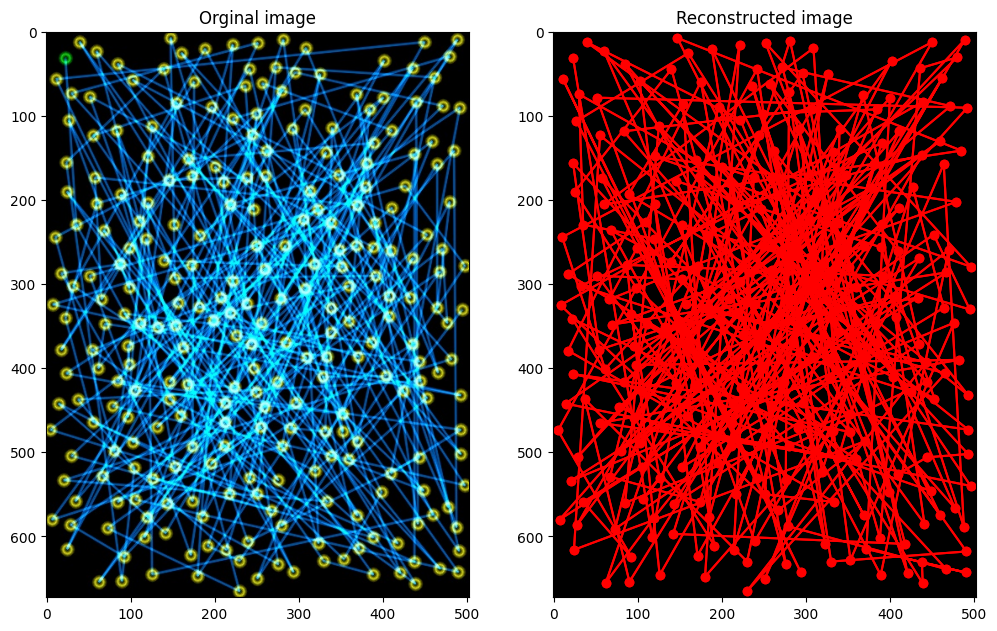

In [25]:
best_path = [all_positions[i] for i in permutation]

fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].imshow(image)
axs[0].set_title("Orginal image")

aprox_image = np.zeros(image.shape)
axs[1].imshow(aprox_image)
axs[1].set_title("Reconstructed image")
axs[1].plot([x[0] for x in best_path], [x[1] for x in best_path], 'ro-')
axs[1].plot([x[0] for x in best_path], [x[1] for x in best_path], 'ro-')

In [26]:
print("orginal path lenght: ", true_lenght)

lenght = 0
for i in range(1, len(best_path)):
    lenght += np.linalg.norm(np.array(best_path[i]) - np.array(best_path[i-1]))

print("Lenght of the path: ", lenght)

orginal path lenght:  83110
Lenght of the path:  87522.34819753794


## brute force

In [27]:
from line_detection_functions import get_best_path
best_path_order = get_best_path(matr,abort=0.4)
print(best_path_order)

[]


In [28]:
best_path = [all_positions[i] for i in best_path_order]

fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].imshow(image)
axs[0].set_title("Orginal image")

aprox_image = np.zeros(image.shape)
axs[1].imshow(aprox_image)
axs[1].set_title("Reconstructed image")
axs[1].plot([x[0] for x in best_path], [x[1] for x in best_path], 'ro-')
axs[1].plot([x[0] for x in best_path], [x[1] for x in best_path], 'ro-')

## backtracking

In [29]:
#new try using the best path always.
#once we arrive at a point where the taken path is not in the original N best baths,
#we go back check where we want to go next, see where this point was taken, go back there and take the next best path
#continue from there somehow make shure it doesnt loop

In [30]:
from line_detection_functions import backtrack_search

K= 5
S= 5
depth = 5

path = [0]

result = backtrack_search(matr, path, K, S, 0, depth)

print(result)

False


In [31]:
#solution copyed from Maxime in tools.ipynb
def most_probable_path_dp(prob_matrix):
    n = prob_matrix.shape[0]  # Number of circles (nodes)
    memo = {}  # Dictionary to memoize results
    
    def dp(visited, last):
        # If the result for this state is already computed, return it
        if (visited, last) in memo:
            return memo[(visited, last)]
        
        # If all nodes are visited, return the probability of 1 and the current path
        if visited == (1 << n) - 1:
            return 1, [last]
        
        max_prob = 0  # Initialize maximum probability
        best_path = []  # Initialize best path
        
        # Explore all possible next nodes
        for i in range(n):
            # If node i is not visited
            if not visited & (1 << i):
                # Recursive call to compute the probability and path for the next state
                prob, path = dp(visited | (1 << i), i)
                prob *= prob_matrix[last, i]  # Update the probability with the current edge
                
                # Update max_prob and best_path if the current probability is higher
                if prob > max_prob:
                    max_prob = prob
                    best_path = path
        
        # Memoize the result for the current state
        memo[(visited, last)] = (max_prob, [last] + best_path)
        return memo[(visited, last)]
    
    max_prob = 0  # Initialize maximum probability for the overall best path
    best_path = []  # Initialize best path for the overall best path
    
    i = 0
    prob, path = dp(1 << i, i)  # Start with node i visited
    return path

    #not necessary since we know the staring point
    # Try starting the path from each node
    for i in range(n):
        prob, path = dp(1 << i, i)  # Start with node i visited
        # Update max_prob and best_path if the current probability is higher
        if prob > max_prob:
            max_prob = prob
            best_path = path
    
    return best_path

# Example usage
prob_matrix = np.array([
    [0, 0.8, 0.5, 0.2],  # Probabilities of paths from node 0 to other nodes
    [0.8, 0, 0.6, 0.4],  # Probabilities of paths from node 1 to other nodes
    [0.5, 0.6, 0, 0.9],  # Probabilities of paths from node 2 to other nodes
    [0.2, 0.4, 0.9, 0]   # Probabilities of paths from node 3 to other nodes
])

# Compute the most probable path
most_probable_path_dp(prob_matrix)

[0, 1, 2, 3]

In [32]:
inv_matr = 1-matr

best_path = most_probable_path_dp(inv_matr)
print(best_path)

KeyboardInterrupt: 

## ideas left

- building chains and connecting them
- better array functions implementing hard caps at ex 0.05
- combining backtrack and chains
- beam search
- backtrack with threshold instead of top 5
- better line detection dont use RGB use HUE
- better line detection check for black pixels next to the line
- faster line detection   linspace


In [ ]:
matr = backup.copy()

In [ ]:
schwellw = 0.05
drueber = []
for row in range(matr.shape[0]):
    schw_sum = 0
    for val in range(matr.shape[1]):
        if matr[row, val] < schwellw:
            schw_sum += 1
    drueber.append(schw_sum)

print(drueber)

[2, 4, 5, 7, 2, 3, 5, 3, 4, 6, 4, 7, 3, 3, 7, 4, 3, 1, 2, 5, 7, 7, 3, 6, 8, 4, 3, 4, 5, 6, 4, 2, 6, 6, 1, 8, 3, 13, 9, 8, 3, 7, 9, 9, 3, 7, 5, 2, 5, 12, 16, 6, 3, 2, 4, 4, 11, 15, 4, 3, 4, 3, 8, 2, 8, 4, 8, 6, 4, 7, 14, 10, 14, 7, 6, 6, 10, 4, 6, 9, 28, 6, 19, 3, 9, 12, 21, 30, 6, 2, 18, 34, 8, 3, 8, 4, 22, 12, 14, 21, 20, 25, 8, 9, 10, 8, 7, 8, 3, 10, 3, 5, 11, 6, 13, 6, 16, 8, 5, 21, 1, 13, 25, 11, 25, 20, 5, 26, 20, 3, 1, 20, 19, 11, 31, 1, 12, 5, 33, 1, 2, 12, 16, 6, 22, 8, 5, 24, 4, 30, 7, 26, 5, 9, 5, 22, 7, 10, 4, 2, 5, 25, 21, 0, 9, 23, 13, 5, 4, 11, 29, 2, 14, 7, 17, 22, 22, 5, 3, 6, 4, 10, 5, 3, 15, 24, 8, 21, 29, 7, 5, 23, 21, 10, 5, 1, 4, 3, 20, 26, 2, 10, 9, 5, 3, 9, 8, 8, 5, 0, 20, 3, 20, 3, 8, 6, 3, 15, 22, 6, 1, 20, 4, 7, 4, 6, 10, 8, 4, 5, 6, 3, 4, 2, 5, 10, 4, 2, 3, 7, 3, 8, 3, 8, 2, 3, 5, 9, 5, 4, 6, 12, 5, 6, 4, 5, 4, 3, 3, 7, 3, 5, 3, 6, 3, 7, 6, 5]


In [ ]:
def factorial(n):
    fact = 1
    for num in range(2, n + 1):
        fact *= num
    return fact

i = 120
print(factorial(i)) 

6689502913449127057588118054090372586752746333138029810295671352301633557244962989366874165271984981308157637893214090552534408589408121859898481114389650005964960521256960000000000000000000000000000
